# 9.1 术语速成

# 9.2 ANOVA模型拟合

## 9.2.1 aov()函数

aov()函数的语法为aov(formula,data=dataframe)。
![R表达式中的特殊符号.jpg](./image/R表达式中的特殊符号.jpg)
其中y是因变量，字母A、B、C代表因子。

下表是一些常见的额研究设计表达式。

小写字母表示定量变量

大写字母表示组别因子

subject是对被试者独有的标识变量。

![常见研究设计的表达式.jpg](./image/常见研究设计的表达式.jpg)

## 9.2.2 表达式中各项的顺序

表达式中效应的顺序在两种情况下会造成影响：

    （1）因子不止一个，并且是非平衡设计；
    （2）存在协变量。

出现任意一种情况时，等式右边的变量都与其他每个变量相关。

此时，我们无法清晰地划分它们对因变量的影响。

R默认类型I（序贯型）方法计算ANOVA效应。（参考下面的补充内容）
![顺序很重要.jpg](./image/顺序很重要.jpg)

car包中的Anova()函数（不要与标准anova()函数混淆）提供了使用类型Ⅱ或类型Ⅲ方法的选项

aov()函数使用的是类型I方法

# 9.3 单因素方差分析

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsWarning message:
"package 'multcomp' was built under R version 3.5.2"Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.5.2"Loading required package: survival
Loading required package: TH.data
Warning message:
"package 'TH.data' was built under R version 3.5.2"Loading required package: MASS

Attaching package: 'TH.data'

The following object is masked from 'package:MASS':

    geyser



trt
 1time 2times 4times  drugD  drugE 
    10     10     10     10     10 

Group.1,x
1time,5.78197
2times,9.22497
4times,12.37478
drugD,15.36117
drugE,20.94752


Group.1,x
1time,2.878113
2times,3.483054
4times,2.923119
drugD,3.454636
drugE,3.345003


            Df Sum Sq Mean Sq F value   Pr(>F)    
trt          4 1351.4   337.8   32.43 9.82e-13 ***
Residuals   45  468.8    10.4                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Installing package into 'C:/Users/acer/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'gplots' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\acer\AppData\Local\Temp\RtmpSoqw05\downloaded_packages


Warning message:
"package 'gplots' was built under R version 3.5.3"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



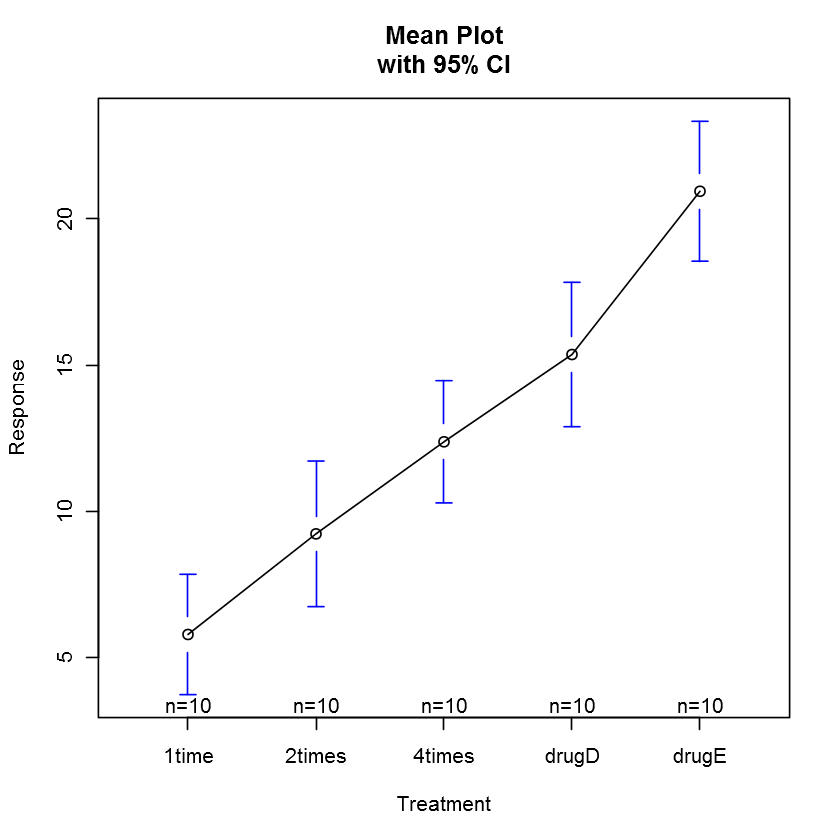

In [2]:
#单因素方差分析
#以multcomp包中cholesterol数据集为例，50个患者均接受降低胆固醇药物治疗（trt）五种疗法中的一种疗法
library(multcomp)
attach(cholesterol)

table(trt)  #各组样本大小
#输出结果看，每10个患者接受其中一个药物疗法

aggregate(response,by=list(trt),FUN=mean) #各组均值
#均值显示drygE降低胆固醇最多，而1time降低胆固醇最少

aggregate(response,by=list(trt),FUN=sd) #各组标准差
#各组的标准差相对恒定，在2.88到3.48间浮动

#检验组间差异（ANOVA）
fit <- aov(response ~ trt)
summary(fit)
#ANOVA对治疗方式（trt）的F检验非常显著（p<0.0001），说明五种疗法的效果不同

#绘制各组均值及其置信区间的图形
install.packages("gplots")
library(gplots)
plotmeans(response ~ trt, xlab="Treatment",ylab="Response",
         main="Mean Plot\nwith 95% CI")

detach(cholesterol)

## 9.3.1 多重比较

TukeyHSD()函数提供了对各组均值差异的成对检验

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = response ~ trt)

$trt
                  diff        lwr       upr     p adj
2times-1time   3.44300 -0.6582817  7.544282 0.1380949
4times-1time   6.59281  2.4915283 10.694092 0.0003542
drugD-1time    9.57920  5.4779183 13.680482 0.0000003
drugE-1time   15.16555 11.0642683 19.266832 0.0000000
4times-2times  3.14981 -0.9514717  7.251092 0.2050382
drugD-2times   6.13620  2.0349183 10.237482 0.0009611
drugE-2times  11.72255  7.6212683 15.823832 0.0000000
drugD-4times   2.98639 -1.1148917  7.087672 0.2512446
drugE-4times   8.57274  4.4714583 12.674022 0.0000037
drugE-drugD    5.58635  1.4850683  9.687632 0.0030633


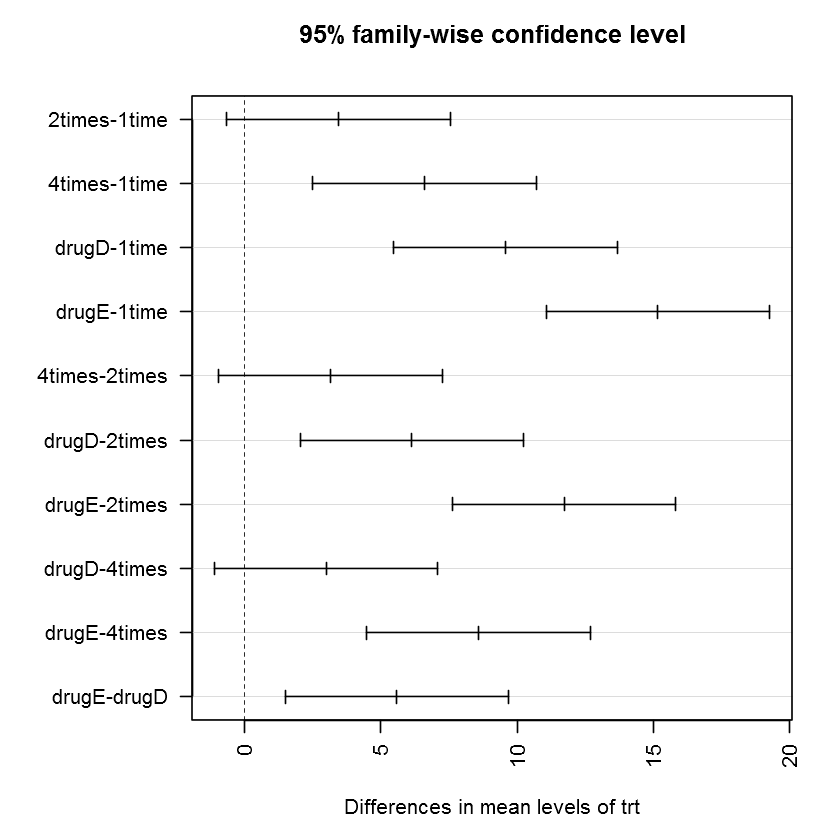

In [4]:
#TukeyHSD的成对组间比较
TukeyHSD(fit)

#作图
par(las=2)
par(mar=c(5,8,4,2))
plot(TukeyHSD(fit))

multcomp包中的glht()函数提供了多重均值比较更为全面的方法，既适用于线性模型也适用于广义线性模型。

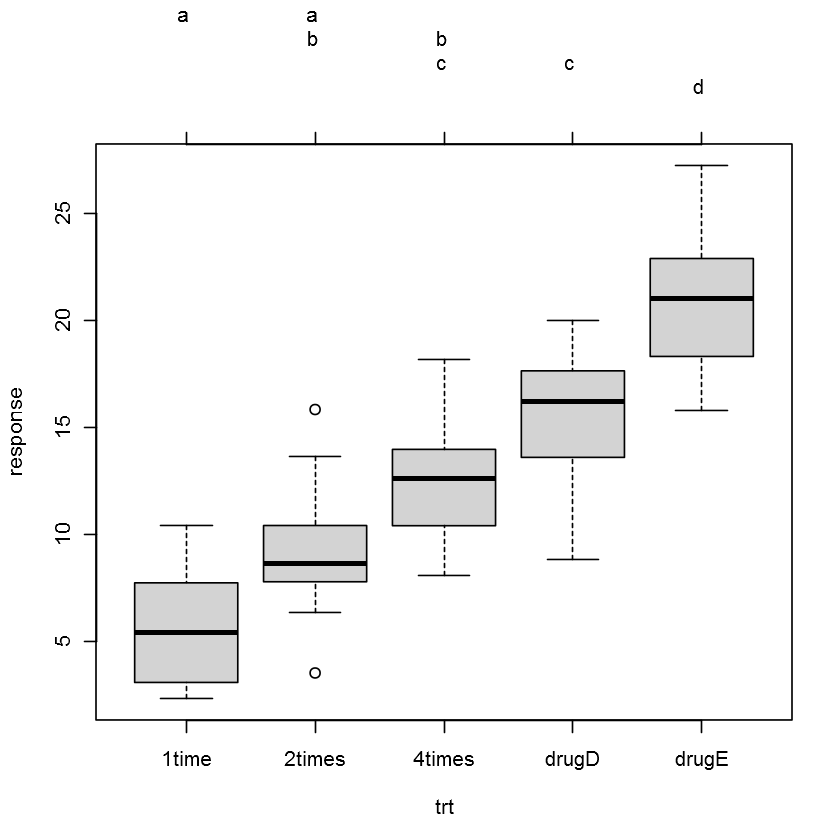

In [5]:
library(multcomp)
par(mar=c(5,4,6,2)) #增大顶部边界面积
tuk <- glht(fit,linfct=mcp(trt="Tukey"))
plot(cld(tuk,level=0.05),col="lightgrey")  #cld()函数中的level选项设置了使用的显著水平

## 9.3.2 评估检验的假设条件

单因素方差分析，我们假设因变量服从正态分布、各组方差相等，可以使用Q-Q图来检验正态性假设：

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] 19 38

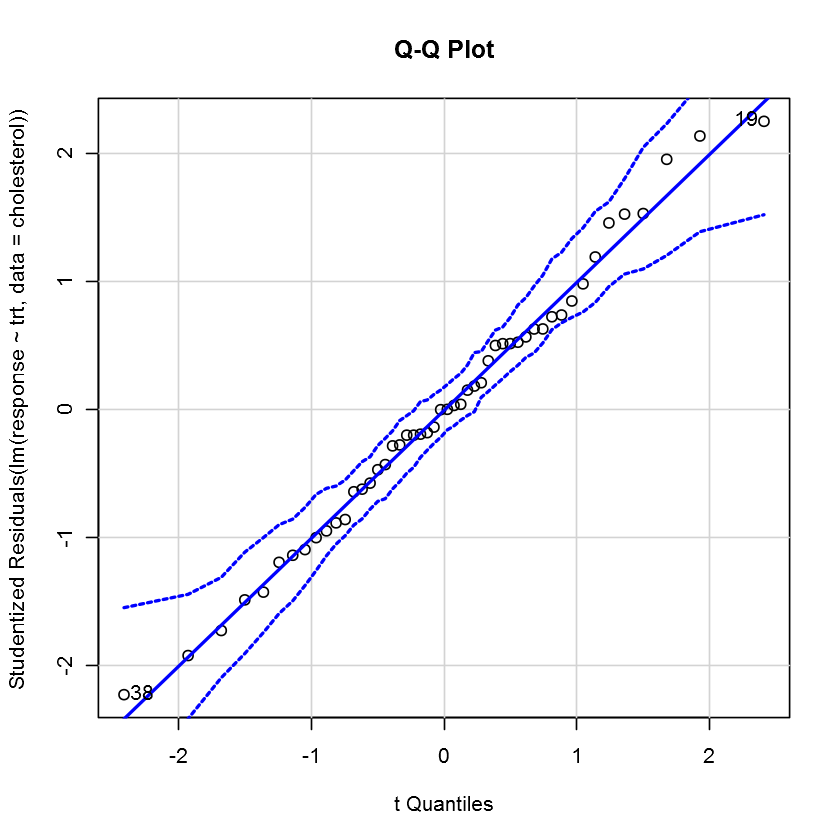

In [8]:
library(car)
qqPlot(lm(response ~ trt,data=cholesterol), #注意qqPlot()要求用lm()拟合
      sumulate=TRUE,main="Q-Q Plot", labels=FALSE)

In [11]:
#通过以下代码来做Bartlett检验，可以用来做方差
bartlett.test(response~trt, data=cholesterol)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


	Bartlett test of homogeneity of variances

data:  response by trt
Bartlett's K-squared = 0.57975, df = 4, p-value = 0.9653


Fligner-Killeen检验用fligner.test()函数

Brown-Forsythe检验用HH包中的hov()函数

In [12]:
#方差齐性分析对离群点非常敏感。可利用car包中的outlierTest()函数来检测离群点
library(car)
outlierTest(fit)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

No Studentized residuals with Bonferonni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferonni p
19 2.251149           0.029422           NA

# 9.4 单因素协方差分析

单因素方差分析，以multcomp包中的cholesteril数据集为例，50个患者均接受降低胆固醇药物治疗物种疗法中的一种疗法。 其中三种治疗条件使用药物的两种方式（drugD和drugE)代表候选药物，那种药物疗法降低胆固醇（响应变量）最多呢

In [1]:
library(multcomp)
attach(cholesterol)
table(trt) #各组样本大小

Warning message:
"package 'multcomp' was built under R version 3.5.3"Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.5.2"Loading required package: survival
Loading required package: TH.data
Warning message:
"package 'TH.data' was built under R version 3.5.2"Loading required package: MASS

Attaching package: 'TH.data'

The following object is masked from 'package:MASS':

    geyser



trt
 1time 2times 4times  drugD  drugE 
    10     10     10     10     10 

In [2]:
aggregate(response,by=list(trt),FUN=mean) #各组均值

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Group.1,x
<fct>,<dbl>
1time,5.78197
2times,9.22497
4times,12.37478
drugD,15.36117
drugE,20.94752


In [3]:
fit <- aov(response ~ trt)  #检查组间差异（ANOVA）
summary(fit)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

            Df Sum Sq Mean Sq F value   Pr(>F)    
trt          4 1351.4   337.8   32.43 9.82e-13 ***
Residuals   45  468.8    10.4                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsWarning message:
"package 'gplots' was built under R version 3.5.3"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



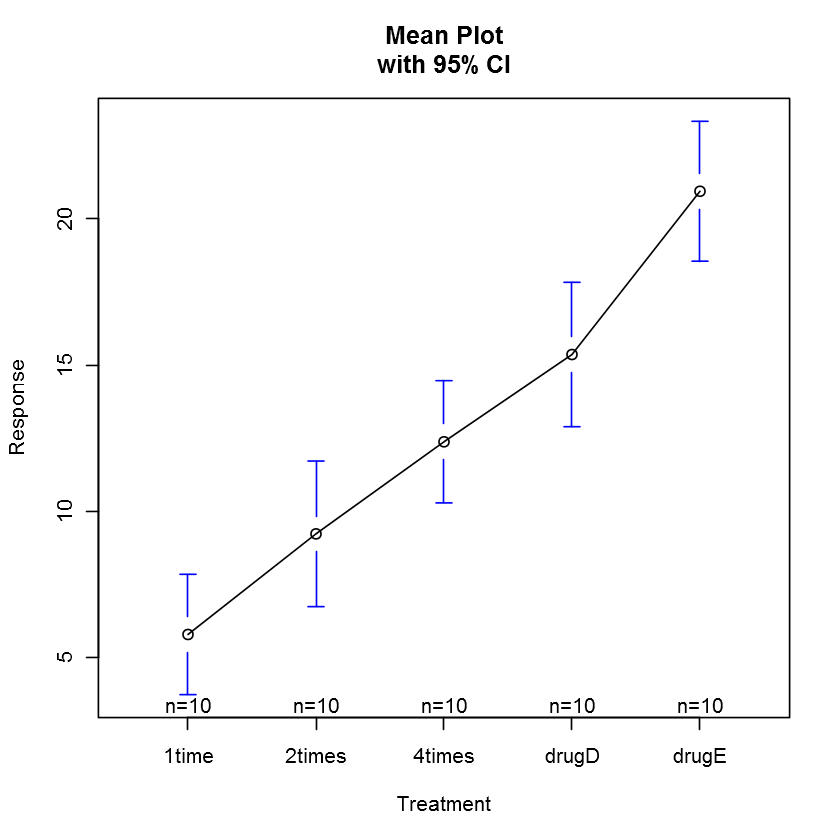

In [4]:
#绘制各组均值及其置信区间
library(gplots)
plotmeans(response~trt,xlab="Treatment", ylab="Response",main="Mean Plot\nwith 95% CI")
detach(cholesterol)

## 9.3.1 多重比较

TukeyHSD()提供了对各组均值差异的成对检验

In [5]:
#TukeyHSD的成对组间比较
TukeyHSD(fit)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = response ~ trt)

$trt
                  diff        lwr       upr     p adj
2times-1time   3.44300 -0.6582817  7.544282 0.1380949
4times-1time   6.59281  2.4915283 10.694092 0.0003542
drugD-1time    9.57920  5.4779183 13.680482 0.0000003
drugE-1time   15.16555 11.0642683 19.266832 0.0000000
4times-2times  3.14981 -0.9514717  7.251092 0.2050382
drugD-2times   6.13620  2.0349183 10.237482 0.0009611
drugE-2times  11.72255  7.6212683 15.823832 0.0000000
drugD-4times   2.98639 -1.1148917  7.087672 0.2512446
drugE-4times   8.57274  4.4714583 12.674022 0.0000037
drugE-drugD    5.58635  1.4850683  9.687632 0.0030633


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

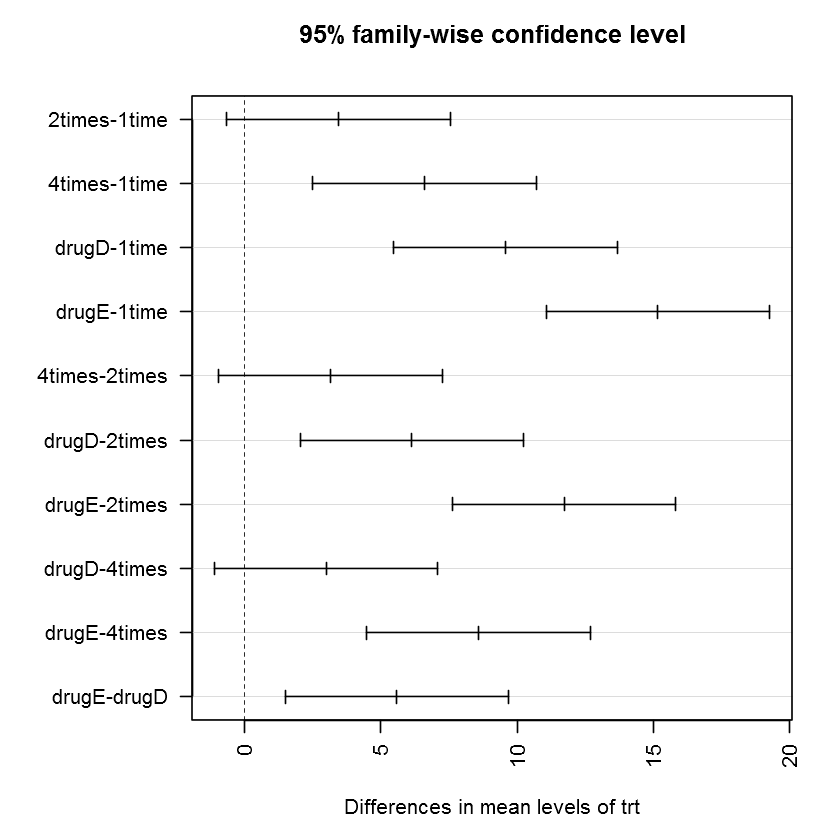

In [6]:
#成对比较图
par(las=2)
par(mar=c(5,8,4,2))
plot(TukeyHSD(fit))

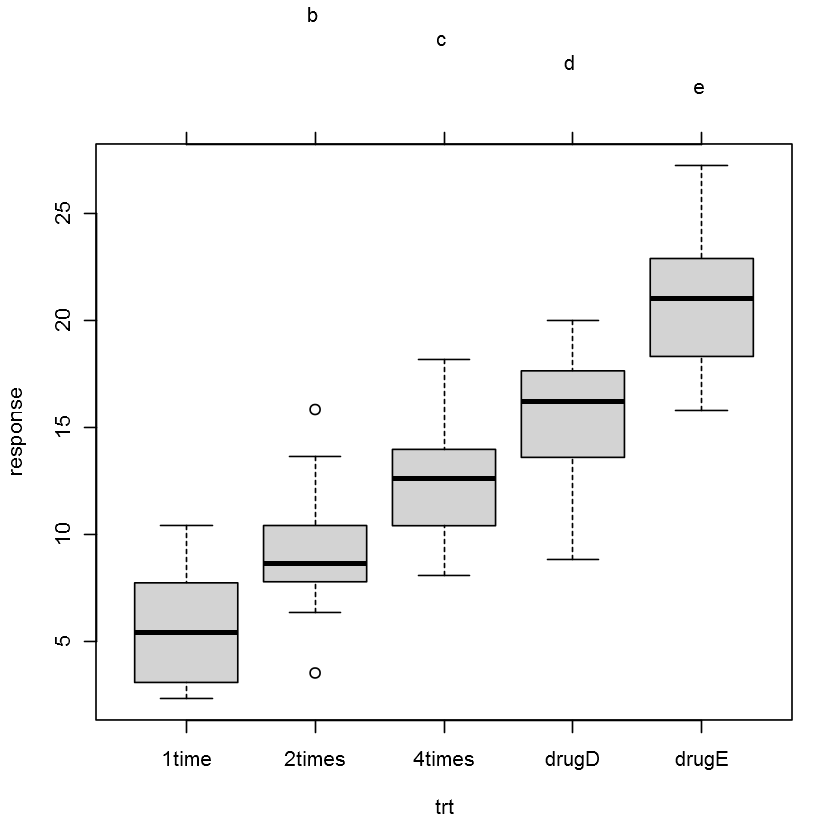

In [7]:
library(multcomp)
par(mar=c(5,4,6,2))
tuk <- glht(fit,linfct=mcp(trt="Tukey"))
plot(cld(tuk,level=0.5),col="lightgrey")

## 9.3.2 评估检验的假设条件

[1] 19 38

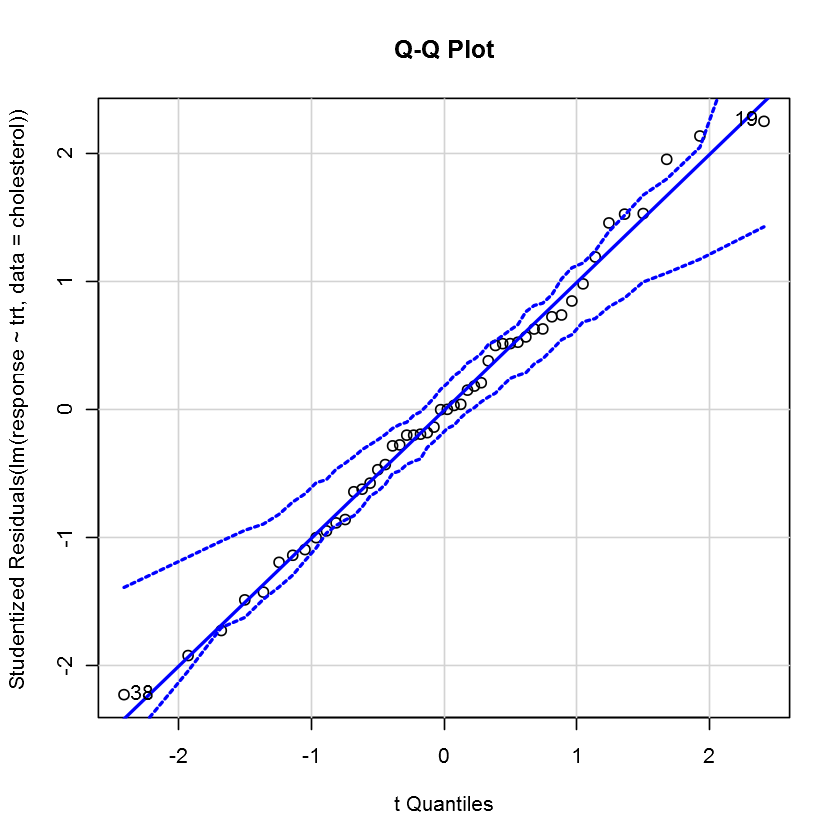

In [9]:
#用Q-Q图来检验正态性假设
library(car)
qqPlot(lm(response~ trt,data=cholesterol),
      simulate=TRUE, main="Q-Q Plot",labels=FALSE)

In [10]:
#用Bartlett检验做方差齐性检验
bartlett.test(response ~ trt, data= cholesterol)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


	Bartlett test of homogeneity of variances

data:  response by trt
Bartlett's K-squared = 0.57975, df = 4, p-value = 0.9653


In [11]:
#利用car包中的outlierTest()来检测离群点
library(car)
outlierTest(fit)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

No Studentized residuals with Bonferonni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferonni p
19 2.251149           0.029422           NA

# 9.4 单因素协方差分析

In [12]:
data(litter,package="multcomp")
attach(litter)
table(dose)

dose
  0   5  50 500 
 20  19  18  17 

In [13]:
aggregate(weight,by=list(dose),FUN=mean) #获取各组均值

Group.1,x
<fct>,<dbl>
0,32.30850
5,29.30842
50,29.86611
500,29.64647


In [14]:
fit <- aov(weight ~ gesttime + dose)
summary(fit)

            Df Sum Sq Mean Sq F value  Pr(>F)   
gesttime     1  134.3  134.30   8.049 0.00597 **
dose         3  137.1   45.71   2.739 0.04988 * 
Residuals   69 1151.3   16.69                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [15]:
#获取去除协变量效应后的组均值
library(effects)
effect("dose",fit)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsWarning message:
"package 'effects' was built under R version 3.5.3"lattice theme set by effectsTheme()
See ?effectsTheme for details.



 dose effect
dose
       0        5       50      500 
32.35367 28.87672 30.56614 29.33460 

对用户定义的对照组的多重比较

In [18]:
library(multcomp)
contrast <- rbind("no drug vs. drug"=c(3,-1,-1,-1))
summary(glht(fit,linfct=mcp(dose=contrast)))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: User-defined Contrasts


Fit: aov(formula = weight ~ gesttime + dose)

Linear Hypotheses:
                      Estimate Std. Error t value Pr(>|t|)  
no drug vs. drug == 0    8.284      3.209   2.581    0.012 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)
